In [33]:
%pip install torch

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
%pip install tf-keras

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
%pip install textblob

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
import torch
#print(torch.__version__) # test to see if installed correctly what version
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

Comment: testing, testing, testing [{'label': 'POSITIVE', 'score': 0.9528170228004456}]
Comment: end of test 1 [{'label': 'POSITIVE', 'score': 0.6046104431152344}]
Comment: end of test2 [{'label': 'NEGATIVE', 'score': 0.9743235111236572}]
Comment: end of test3 [{'label': 'NEGATIVE', 'score': 0.9682359099388123}]
No comment
Average Sentiment Score: -0.09628298878669739


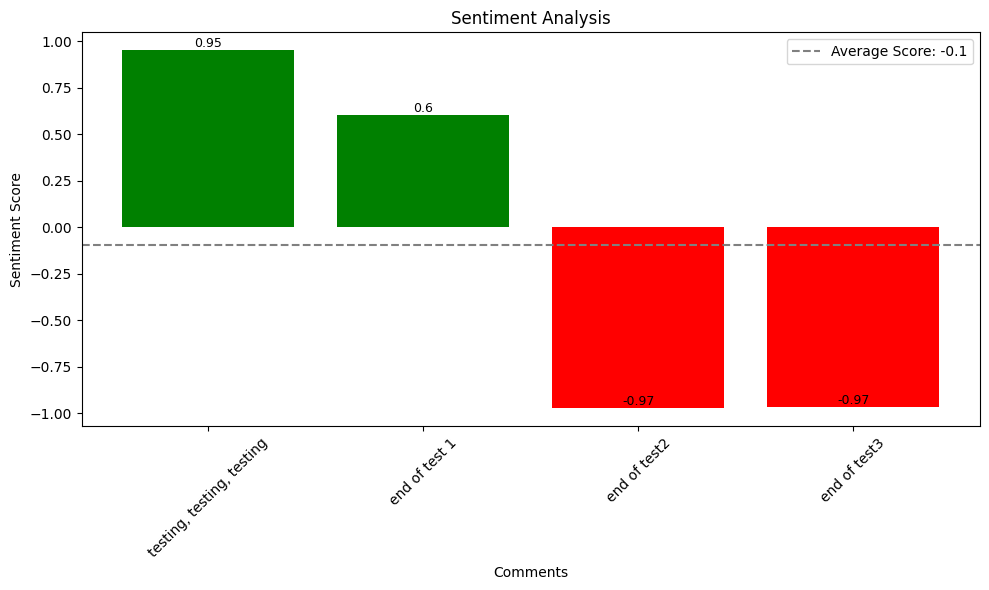

In [62]:
import torch
#print(torch.__version__) # test to see if installed correctly what version
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import csv
from transformers import pipeline

# Define the file path
file_path = "/Users/amendatate/Documents/HCI584/museum_wellbeing_survey/data/wellbeing_survey.csv"

# Specify the model name DistilBERT model from Hugging Face fine-tined on the Standford Sentiment Treebank v2 (SST-2) dataset
model_name = "distilbert-base-uncased-finetuned-sst-2-english"

# Create the sentiment analysis pipeline with the specified model
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name)

try:
    # Empty list to accumulate sentiment scores
    sentiment_scores = []
    comments = []
    original_texts = []

    # Open the CSV file for reading
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)

        # Skip the header row
        next(reader)
        
        # Iterate over each row and print the 8th element
        for row in reader:
            # Check if the row has at least 8 elements
            if len(row) >= 8:
                if row[7] == "": # If the entry is blank, say so
                    print("No comment") # Get the 8th element from each row
                else:
                    data = row[7]
                    results = sentiment_pipeline(data) # Apply sentiment analysis
                    print("Comment:", row[7], results) # Show the comment and the sentiment result

                    # Append the sentiment score to the list
                    score = results[0]['score'] if results[0]['label'] == 'POSITIVE' else -results[0]['score']
                    sentiment_scores.append(score)
                    comments.append(row[7])
                    original_texts.append(data)
            else:
                print("Row does not have 8 elements:", row) # Check for missing data elements

        # Calculate the average sentiment score
    if sentiment_scores:
        average_score = sum(sentiment_scores) / len(sentiment_scores)
        print(f"Average Sentiment Score: {average_score}")
    else:
        print("No comments to analyze for sentiment.")

    # Create a DataFrame to store the sentiment scores and optional comments
    df_sentiment = pd.DataFrame({'Sentiment Score': sentiment_scores, 'Comment': comments, 'Text': original_texts})

    # Create bar chart with colored bars based on sentiment score
    colors = ['green' if score >= 0 else 'red' for score in df_sentiment['Sentiment Score']]
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df_sentiment.index, df_sentiment['Sentiment Score'], color=colors)

    # Add labels, title, and axis labels
    plt.title('Sentiment Analysis')
    plt.xlabel('Comments')
    plt.ylabel('Sentiment Score')
    plt.xticks(df_sentiment.index, df_sentiment['Comment'], rotation=45)  # Rotate x-axis labels if needed

 # Add value labels on top of the bars
    for bar, score in zip(bars, df_sentiment['Sentiment Score']):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{round(score, 2)}',
                 ha='center', va='bottom', fontsize=9)

   # Add horizontal line for average sentiment score
    plt.axhline(y=average_score, color='gray', linestyle='--', label=f'Average Score: {round(average_score, 2)}')

    plt.legend()  # Show legend with average score
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.") # In case file is not found at the path
except Exception as e:
    print(f"An error occurred: {e}") # Catch other error